In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.compose import make_column_transformer
from sklearn import svm
from sklearn import metrics

In [3]:
def OneHotEncoding(labels):
    # convert array
    labels = np.array(labels)
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(labels)
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

## Problem 1: Prisoner Delimma

In [4]:
df = pd.read_csv('UCI_Heart_Disease.csv',index_col=False)
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

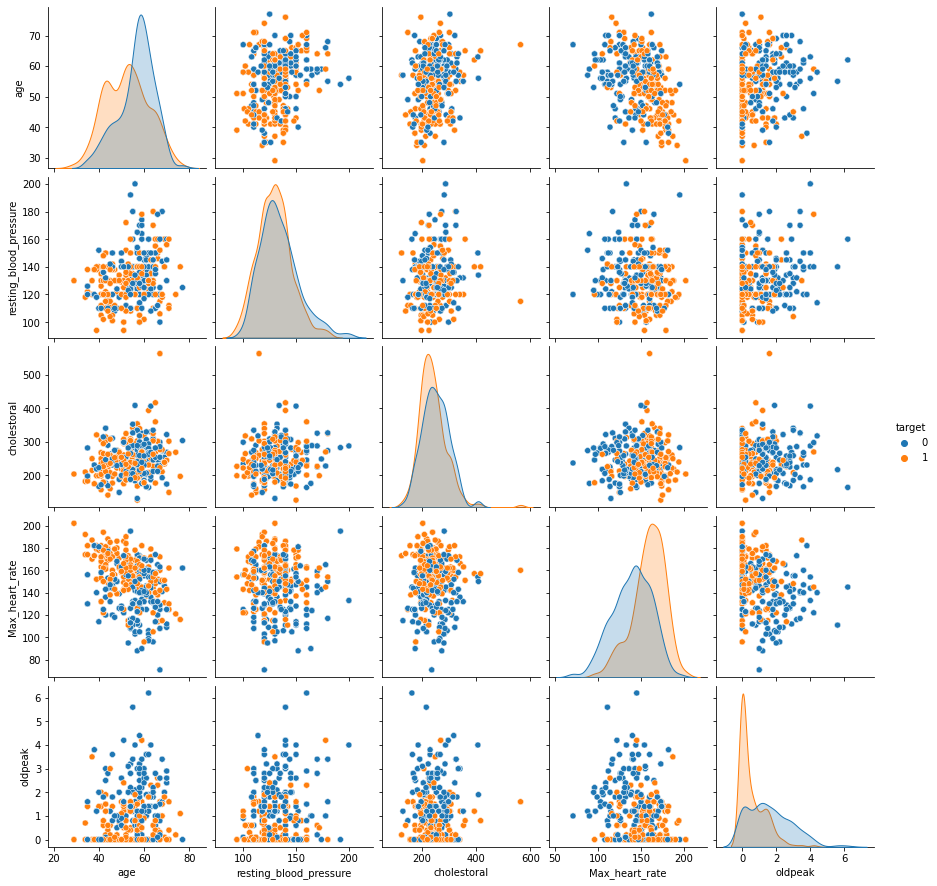

In [6]:
sns.pairplot(data=df,hue='target')
plt.show()

## Preprocessing

In [7]:
# get label from dataframe
label = df['target'].to_numpy()
df = df.drop(columns ='target')

# locate the catagotical columns (ie.feature described by words, not numbers)
catagorical_col = []
columns = df.columns[:]
for col in columns:
    if type(df[col][0])==type('str'):
        catagorical_col.append(col)
        
# transform str feature to numerical feature
column_transformer = make_column_transformer(
    (OneHotEncoder(), catagorical_col), remainder = 'passthrough')

data = column_transformer.fit_transform(df)


X = data
y = label

x_train, x_val, y_train, y_val = train_test_split(data,label,stratify=label,test_size = 0.2,random_state=555,shuffle=True)

## SVM Classification

In [8]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
predictions = clf.predict(x_val)
acc = metrics.accuracy_score(y_val,predictions)
prec = metrics.precision_score(y_val,predictions)
recall = metrics.recall_score(y_val,predictions)
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', recall)

Accuracy: 0.8634146341463415
Precision: 0.8532110091743119
Recall: 0.8857142857142857


In [9]:
clf = svm.SVC(kernel='poly', coef0=15)
clf.fit(x_train, y_train)
predictions = clf.predict(x_val)
acc = metrics.accuracy_score(y_val,predictions)
prec = metrics.precision_score(y_val,predictions)
recall = metrics.recall_score(y_val,predictions)
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', recall)

Accuracy: 0.8390243902439024
Precision: 0.839622641509434
Recall: 0.8476190476190476


In [10]:
clf = svm.SVC(kernel='sigmoid', gamma = 1/13)
clf.fit(x_train, y_train)
predictions = clf.predict(x_val)
acc = metrics.accuracy_score(y_val,predictions)
prec = metrics.precision_score(y_val,predictions)
recall = metrics.recall_score(y_val,predictions)
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', recall)

Accuracy: 0.5121951219512195
Precision: 0.5121951219512195
Recall: 1.0


In [11]:
clf = svm.SVC(kernel='rbf', gamma = 1/13)
clf.fit(x_train, y_train)
predictions = clf.predict(x_val)
acc = metrics.accuracy_score(y_val,predictions)
prec = metrics.precision_score(y_val,predictions)
recall = metrics.recall_score(y_val,predictions)
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', recall)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
